 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="#アンサンブル学習について" data-toc-modified-id="アンサンブル学習について-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>アンサンブル学習について</a></span><ul class="toc-item"><li><span><a href="#irisデータに対してMajorityVoteClassifierを適用" data-toc-modified-id="irisデータに対してMajorityVoteClassifierを適用-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>irisデータに対してMajorityVoteClassifierを適用</a></span></li><li><span><a href="#決定領域をplot" data-toc-modified-id="決定領域をplot-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>決定領域をplot</a></span></li><li><span><a href="#バギング：ブーストラップ標本を用いた分類アンサンブルの構築" data-toc-modified-id="バギング：ブーストラップ標本を用いた分類アンサンブルの構築-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>バギング：ブーストラップ標本を用いた分類アンサンブルの構築</a></span></li></ul></li></ul></div>

# アンサンブル学習について

`scipy.misc.comb(n, r)`は

$$
{}_n C _r
$$
を求める関数

In [2]:
from scipy.misc import comb
import math

def ensemble_error(n_classifier, error):
    k_start = math.ceil(n_classifier / 2.0)  # math.ceil　関数は天井関数と呼ばれるもの 　math.ceil(x): (x 以上の最小の整数) を返します
    probs = [comb(n_classifier, k) * error**k * (1-error)**(n_classifier - k)
             for k in range(k_start, n_classifier + 1)]  # 誤り分類率を計算する
    return sum(probs)

In [3]:
ensemble_error(n_classifier=11, error=0.25)

0.034327507019042969

In [4]:
import numpy as np

error_range = np.arange(0.0, 1.01, 0.01)
ens_errors = [ensemble_error(n_classifier=11, error=error)
              for error in error_range]

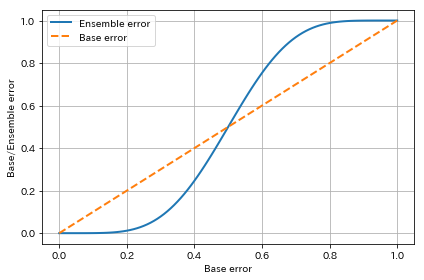

In [5]:
import matplotlib.pyplot as plt

plt.plot(error_range, 
         ens_errors, 
         label='Ensemble error', 
         linewidth=2)

plt.plot(error_range, 
         error_range, 
         linestyle='--',
         label='Base error',
         linewidth=2)

plt.xlabel('Base error')
plt.ylabel('Base/Ensemble error')
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
# plt.savefig('./figures/ensemble_err.png', dpi=300)
plt.show()

In [6]:
import numpy as np
#  bincount関数では第一引数における各値の出現に対して第二引数による重み付けを行う．
np.argmax(np.bincount([0, 0, 1], weights=[0.2, 0.2, 0.6]))

1

In [7]:
np.bincount([0, 0, 1], weights=[0.2, 0.2, 0.6])

array([ 0.4,  0.6])

In [8]:
# 2値分類 における重み付き平均
# 行は識別器の数，列はクラス数を表す
ex = np.array([[0.9, 0.1],
               [0.8, 0.2],
               [0.4, 0.6]])

p = np.average(ex, 
               axis=0, 
               weights=[0.2, 0.2, 0.6])
p

array([ 0.58,  0.42])

```python
    np.average()
```
はweight引数より重みつき平均を求めることができる

[配列の要素の平均を求めるNumPyのaverage関数とmean関数の使い方](https://deepage.net/features/numpy-average.html)

In [9]:
np.argmax(p)

0

以下MjorityVOteClassifierに関するテスト

In [10]:
from sklearn.pipeline import _name_estimators
from sklearn.linear_model import LogisticRegression

In [11]:
_name_estimators([LogisticRegression(), LogisticRegression()])

[('logisticregression-1',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
            penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
            verbose=0, warm_start=False)),
 ('logisticregression-2',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
            penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
            verbose=0, warm_start=False))]

In [12]:
from sklearn.datasets import load_iris
iris = load_iris()
X=iris.data
y=iris.target

In [13]:
clfs = [LogisticRegression(), LogisticRegression()]

In [14]:
clf_fit=[clf.fit(X, y) for clf in clfs]

In [18]:
predict_proba=np.asarray([clf.predict_proba(X) for clf in clf_fit])
predict_proba.shape

(2, 150, 3)

In [19]:
avg_proba = np.average(predict_proba, axis=0, weights=[0.1, 0.9])
avg_proba.shape

(150, 3)

In [22]:
predictions=np.asarray([clf.predict(X) for clf in clf_fit]).T
predictions.shape

(150, 2)

In [23]:

maj_vote = np.apply_along_axis(
                func1d=lambda x:
                np.argmax(np.bincount(x, weights=[0.3, 0.7])),
                axis=1,
                arr=predictions)

In [24]:
maj_vote

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [25]:
a=[1,2,3,4,5]

In [26]:
b = a[:]
b

[1, 2, 3, 4, 5]

In [27]:
b[0] = 10
b

[10, 2, 3, 4, 5]

In [28]:
a

[1, 2, 3, 4, 5]

In [29]:
clfs[0].get_params(deep=True)

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

## irisデータに対してMajorityVoteClassifierを適用

In [30]:
from majority_vote_classifier import MajorityVoteClassifier

In [31]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
iris = datasets.load_iris()
X, y = iris.data[50:, [1,2]], iris.target[50:]
le = LabelEncoder()
y = le.fit_transform(y)

In [32]:
X_train, X_test, y_train, y_test =\
       train_test_split(X, y, 
                        test_size=0.5, 
                        random_state=1)

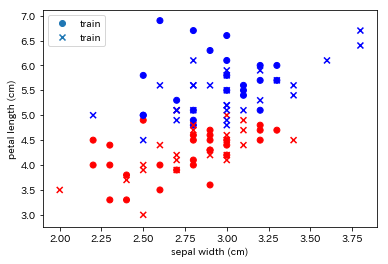

In [33]:
from matplotlib.colors import ListedColormap
%matplotlib inline
cmap = ListedColormap(['r', 'b'])
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap, label='train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap, marker='x',label='train')
plt.xlabel(iris.feature_names[1])
plt.ylabel(iris.feature_names[2])
plt.legend()

In [34]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.pipeline import Pipeline


clf1 = LogisticRegression(penalty='l2', 
                          C=0.001,
                          random_state=0)

clf2 = DecisionTreeClassifier(max_depth=1,
                              criterion='entropy',
                              random_state=0)

clf3 = KNeighborsClassifier(n_neighbors=1,
                            p=2,
                            metric='minkowski') # p=2, 'minkowski'によりユークリッド距離を距離関数にしている

pipe1 = Pipeline([('sc', StandardScaler()),
                  ('clf', clf1)])
pipe3 = Pipeline([('sc', StandardScaler()),
                  ('clf', clf3)])

clf_labels = ['Logistic Regression', 'Decision Tree', 'KNN']

print('10-fold cross validation:\n')
for clf, label in zip([pipe1, clf2, pipe3], clf_labels):
    scores = cross_val_score(estimator=clf, # estimators引数に入れる識別器はfitメソッドが実装されていればなんでも良い
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='roc_auc') # scoring='roc_auc'によりROC曲線下面積を評価することになる
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

10-fold cross validation:

ROC AUC: 0.92 (+/- 0.20) [Logistic Regression]
ROC AUC: 0.92 (+/- 0.15) [Decision Tree]
ROC AUC: 0.93 (+/- 0.10) [KNN]


ここで，アンサンブル学習を行なってみる

In [35]:

# Majority Rule (hard) Voting

mv_clf = MajorityVoteClassifier(classifiers=[pipe1, clf2, pipe3], vote='classlabel')

clf_labels += ['Majority Voting']
all_clf = [pipe1, clf2, pipe3, mv_clf]

for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf, # roc_aucを求めるには識別器にはfitに加えてpredict_proba or decision_function が必要?
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))


ROC AUC: 0.92 (+/- 0.20) [Logistic Regression]
ROC AUC: 0.92 (+/- 0.15) [Decision Tree]
ROC AUC: 0.93 (+/- 0.10) [KNN]
ROC AUC: 0.97 (+/- 0.10) [Majority Voting]


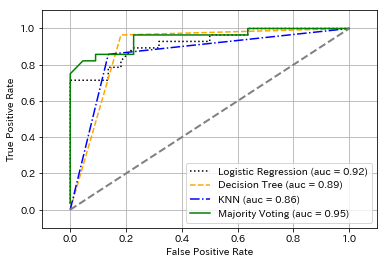

In [36]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc  # Compute Area Under the Curve (AUC) using the trapezoidal rule
# auc は曲線下とx軸との間の面積を求める一般的な関数

colors = ['black', 'orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-']
for clf, label, clr, ls in zip(all_clf, clf_labels, colors, linestyles):

    # assuming the label of the positive class is 1
    y_pred = clf.fit(X_train,
                     y_train).predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr,
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# plt.tight_layout()
# plt.savefig('./figures/roc.png', dpi=300)
plt.show()

## 決定領域をplot

In [37]:
# 決定木を描画するために標準化しておく
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)

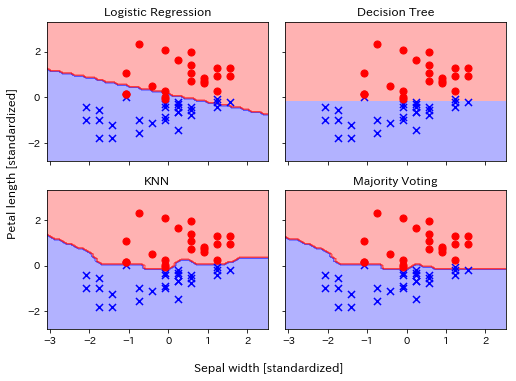

In [38]:
from itertools import product

all_clf = [pipe1, clf2, pipe3, mv_clf]

# 描画領域を決める
x_min = X_train_std[:, 0].min() - 1
x_max = X_train_std[:, 0].max() + 1
y_min = X_train_std[:, 1].min() - 1
y_max = X_train_std[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
# xx, yy= np.mgrid[x_min:x_max:200j, y_min:y_max:200j]  でもOK

f, axarr = plt.subplots(nrows=2, ncols=2, 
                        sharex='col',  # 列ごとにx軸を共有
                        sharey='row',  # 行ごとにy軸を共有
                         figsize=(7, 5))

cmap=ListedColormap(['b', 'r'])

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        all_clf, clf_labels):
    clf.fit(X_train_std, y_train)
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    
    axarr[idx[0], idx[1]].scatter(X_train_std[y_train==0, 0], 
                                  X_train_std[y_train==0, 1], 
                                  c='blue', 
                                  marker='x',
                                  s=50)
    
    axarr[idx[0], idx[1]].scatter(X_train_std[y_train==1, 0], 
                                  X_train_std[y_train==1, 1], 
                                  c='red', 
                                  marker='o',
                                  s=50)
    
    axarr[idx[0], idx[1]].set_title(tt)

# x軸, y軸にラベルづけ
# ha, va = 'center' より指定座標の真ん中にtextをおく
plt.text(-3.5, -4.5, 
         s='Sepal width [standardized]', 
         ha='center', va='center', fontsize=12)
plt.text(-10, 4.5, 
         s='Petal length [standardized]', 
         ha='center', va='center', 
         fontsize=12, rotation=90)

plt.tight_layout()
# plt.savefig('./figures/voting_panel', bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
#product 入力イテラブルのデカルト積（直積）
for i in product([0, 1], [0, 1]):
    print(i)

[productに関するドキュメント](https://docs.python.jp/3/library/itertools.html#itertools.product)

In [39]:
mv_clf.get_params()

{'decisiontreeclassifier': DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=0,
             splitter='best'),
 'decisiontreeclassifier__class_weight': None,
 'decisiontreeclassifier__criterion': 'entropy',
 'decisiontreeclassifier__max_depth': 1,
 'decisiontreeclassifier__max_features': None,
 'decisiontreeclassifier__max_leaf_nodes': None,
 'decisiontreeclassifier__min_impurity_decrease': 0.0,
 'decisiontreeclassifier__min_impurity_split': None,
 'decisiontreeclassifier__min_samples_leaf': 1,
 'decisiontreeclassifier__min_samples_split': 2,
 'decisiontreeclassifier__min_weight_fraction_leaf': 0.0,
 'decisiontreeclassifier__presort': False,
 'decisiontreeclassifier__random_state': 0,
 'decisiontreeclassifier__splitter': 

In [40]:
from sklearn.model_selection import GridSearchCV

params = {'decisiontreeclassifier__max_depth': [1, 2],
          'pipeline-1__clf__C': [0.001, 0.1, 100.0]}

grid = GridSearchCV(estimator=mv_clf,
                    param_grid=params,
                    cv=10,
                    scoring='roc_auc')
grid.fit(X_train, y_train)

cv_keys = ('mean_test_score', 'std_test_score','params')

# cvごとの平均と分散 とその時のパラメータを出力
for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r"
          % (grid.cv_results_[cv_keys[0]][r], 
             grid.cv_results_[cv_keys[1]][r] / 2.0, 
             grid.cv_results_[cv_keys[2]][r]))

0.967 +/- 0.05 {'decisiontreeclassifier__max_depth': 1, 'pipeline-1__clf__C': 0.001}
0.967 +/- 0.05 {'decisiontreeclassifier__max_depth': 1, 'pipeline-1__clf__C': 0.1}
1.000 +/- 0.00 {'decisiontreeclassifier__max_depth': 1, 'pipeline-1__clf__C': 100.0}
0.967 +/- 0.05 {'decisiontreeclassifier__max_depth': 2, 'pipeline-1__clf__C': 0.001}
0.967 +/- 0.05 {'decisiontreeclassifier__max_depth': 2, 'pipeline-1__clf__C': 0.1}
1.000 +/- 0.00 {'decisiontreeclassifier__max_depth': 2, 'pipeline-1__clf__C': 100.0}


In [41]:
import pandas as pd
pd.DataFrame(grid.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_decisiontreeclassifier__max_depth,param_pipeline-1__clf__C,params,rank_test_score,split0_test_score,split0_train_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.003844,0.001319,0.966667,1.0,1,0.001,"{'decisiontreeclassifier__max_depth': 1, 'pipe...",3,1.0,1.0,...,0.666667,1.0,1.0,1.0,1.0,1.0,0.000714,0.000407,0.1,0.0
1,0.003110,0.000964,0.966667,1.0,1,0.1,"{'decisiontreeclassifier__max_depth': 1, 'pipe...",3,1.0,1.0,...,0.666667,1.0,1.0,1.0,1.0,1.0,0.000414,0.000081,0.1,0.0
2,0.003097,0.000957,1.000000,1.0,1,100,"{'decisiontreeclassifier__max_depth': 1, 'pipe...",1,1.0,1.0,...,1.000000,1.0,1.0,1.0,1.0,1.0,0.000311,0.000069,0.0,0.0
3,0.003253,0.001013,0.966667,1.0,2,0.001,"{'decisiontreeclassifier__max_depth': 2, 'pipe...",3,1.0,1.0,...,0.666667,1.0,1.0,1.0,1.0,1.0,0.000506,0.000171,0.1,0.0
4,0.002900,0.000905,0.966667,1.0,2,0.1,"{'decisiontreeclassifier__max_depth': 2, 'pipe...",3,1.0,1.0,...,0.666667,1.0,1.0,1.0,1.0,1.0,0.000033,0.000016,0.1,0.0
5,0.002913,0.000897,1.000000,1.0,2,100,"{'decisiontreeclassifier__max_depth': 2, 'pipe...",1,1.0,1.0,...,1.000000,1.0,1.0,1.0,1.0,1.0,0.000019,0.000009,0.0,0.0


In [42]:
grid.best_params_

{'decisiontreeclassifier__max_depth': 1, 'pipeline-1__clf__C': 100.0}

In [43]:
grid.best_score_

1.0

In [44]:
grid.cv_results_['param_pipeline-1__clf__C'].data

array([0.001, 0.1, 100.0, 0.001, 0.1, 100.0], dtype=object)

## バギング：ブーストラップ標本を用いた分類アンサンブルの構築

In [45]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

# drop 1 class
df_wine = df_wine[df_wine['Class label'] != 1]

y = df_wine['Class label'].values
X = df_wine[['Alcohol', 'Hue']].values
X.shape

(119, 2)

In [46]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
59,2,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520
60,2,12.33,1.10,2.28,16.0,101,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680
61,2,12.64,1.36,2.02,16.8,100,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450
62,2,13.67,1.25,1.92,18.0,94,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630
63,2,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420


In [47]:
np.bincount(df_wine['Class label']) # ２クラス問題であることがわかる．

array([ 0,  0, 71, 48])

In [48]:
# クラスラベルの２値化
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test =\
            train_test_split(X, y, 
                             test_size=0.40, 
                             random_state=1)
le.classes_

array([2, 3])

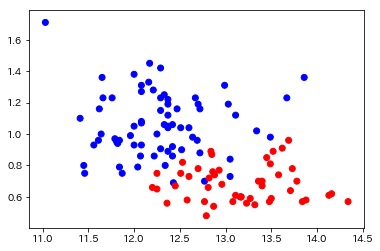

In [49]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

In [50]:
from sklearn.ensemble import BaggingClassifier
# Buggingに使う個々の識別器のオブジェクトを生成
tree = DecisionTreeClassifier(criterion='gini', max_depth=None,# max_depth=Noneだと決定木の深さに制限を設けることなく，各ノードが純粋になるまで分割を繰り返す
                             random_state=1)
bag = BaggingClassifier(base_estimator=tree, n_estimators=500, max_samples=1.0,
                       max_features=1.0,bootstrap=True, 
                        bootstrap_features=False, 
                        n_jobs=1, 
                        random_state=1)

In [51]:
from sklearn.metrics import accuracy_score

tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f'
      % (tree_train, tree_test))

bag = bag.fit(X_train, y_train)
y_train_pred = bag.predict(X_train)
y_test_pred = bag.predict(X_test)

bag_train = accuracy_score(y_train, y_train_pred) 
bag_test = accuracy_score(y_test, y_test_pred) 
print('Bagging train/test accuracies %.3f/%.3f'
      % (bag_train, bag_test))

Decision tree train/test accuracies 1.000/0.917
Bagging train/test accuracies 1.000/0.917


__注意__
```python
     sklearn.metrics.accuracy_score(..., normalized=True)
```
とすると識別に成功したデータの割合を返し，normalized=False だと成功したデータの数を返す

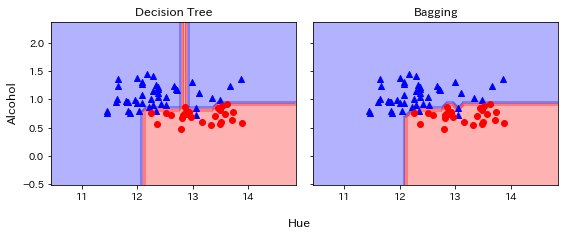

In [52]:
# 決定木とバギングの決定領域をplotする
import numpy as np
import matplotlib.pyplot as plt

x_min = X_train[:, 0].min() - 1
x_max = X_train[:, 0].max() + 1
y_min = X_train[:, 1].min() - 1
y_max = X_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(nrows=1, ncols=2, 
                        sharex='col', 
                        sharey='row', 
                        figsize=(8, 3))


for idx, clf, tt in zip([0, 1],
                        [tree, bag],
                        ['Decision Tree', 'Bagging']):
    clf.fit(X_train, y_train)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx].contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    axarr[idx].scatter(X_train[y_train == 0, 0],
                       X_train[y_train == 0, 1],
                       c='blue', marker='^')

    axarr[idx].scatter(X_train[y_train == 1, 0],
                       X_train[y_train == 1, 1],
                       c='red', marker='o')

    axarr[idx].set_title(tt)

axarr[0].set_ylabel('Alcohol', fontsize=12)
plt.text(10.2, -1.2,
         s='Hue',
         ha='center', va='center', fontsize=12) # va, ha は座標のどこにおくか指定している?

plt.tight_layout()
# plt.savefig('./figures/bagging_region.png',
#            dpi=300,
#            bbox_inches='tight')
plt.show()

__注意__

バギングの分散はブートストラップサンプルのばらつきが反映されるのみなので，決定木間のそう感が強くなり
性能が似かよってしまい十分に性能発揮できない可能性がある．

In [53]:
from sklearn.ensemble import AdaBoostClassifier

tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=1,
                              random_state=0)

ada = AdaBoostClassifier(base_estimator=tree,
                         n_estimators=500, 
                         learning_rate=0.1, # learning rateは何を示すのか?
                         random_state=0)

In [54]:
tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f'
      % (tree_train, tree_test))

ada = ada.fit(X_train, y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)

ada_train = accuracy_score(y_train, y_train_pred) 
ada_test = accuracy_score(y_test, y_test_pred) 
print('AdaBoost train/test accuracies %.3f/%.3f'
      % (ada_train, ada_test))

Decision tree train/test accuracies 0.845/0.854
AdaBoost train/test accuracies 1.000/0.875


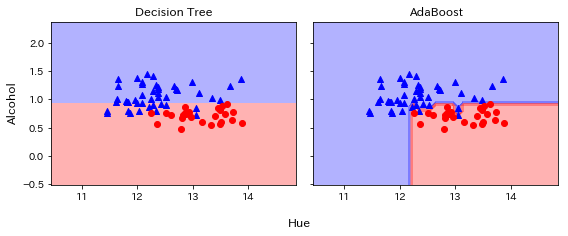

In [55]:
# 決定領域をplot
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(8, 3))


for idx, clf, tt in zip([0, 1],
                        [tree, ada],
                        ['Decision Tree', 'AdaBoost']):
    clf.fit(X_train, y_train)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx].contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    axarr[idx].scatter(X_train[y_train == 0, 0],
                       X_train[y_train == 0, 1],
                       c='blue', marker='^')
    axarr[idx].scatter(X_train[y_train == 1, 0],
                       X_train[y_train == 1, 1],
                       c='red', marker='o')
    axarr[idx].set_title(tt)

axarr[0].set_ylabel('Alcohol', fontsize=12)
plt.text(10.2, -1.2,
         s='Hue',
         ha='center', va='center', fontsize=12)

plt.tight_layout()
# plt.savefig('./figures/adaboost_region.png',
#           dpi=300,
#           bbox_inches='tight')
plt.show()

AdaBoostClassifier のlearning_rate　引数について変化させながらplotしてみる

learning_rate = 0.01の時, 12　番目のestimator error=0.28208090820467374
learning_rate = 0.12の時, 12　番目のestimator error=0.41257177434299575
learning_rate = 0.23の時, 12　番目のestimator error=0.355742172505702
learning_rate = 0.34の時, 12　番目のestimator error=0.38223961286091795
learning_rate = 0.45の時, 12　番目のestimator error=0.3475755487350311
learning_rate = 0.56の時, 12　番目のestimator error=0.32332886043139164
learning_rate = 0.67の時, 12　番目のestimator error=0.32438507197147504
learning_rate = 0.78の時, 12　番目のestimator error=0.34576161508738423
learning_rate = 0.89の時, 12　番目のestimator error=0.36517951065012
learning_rate = 1.0の時, 12　番目のestimator error=0.4083974370642482


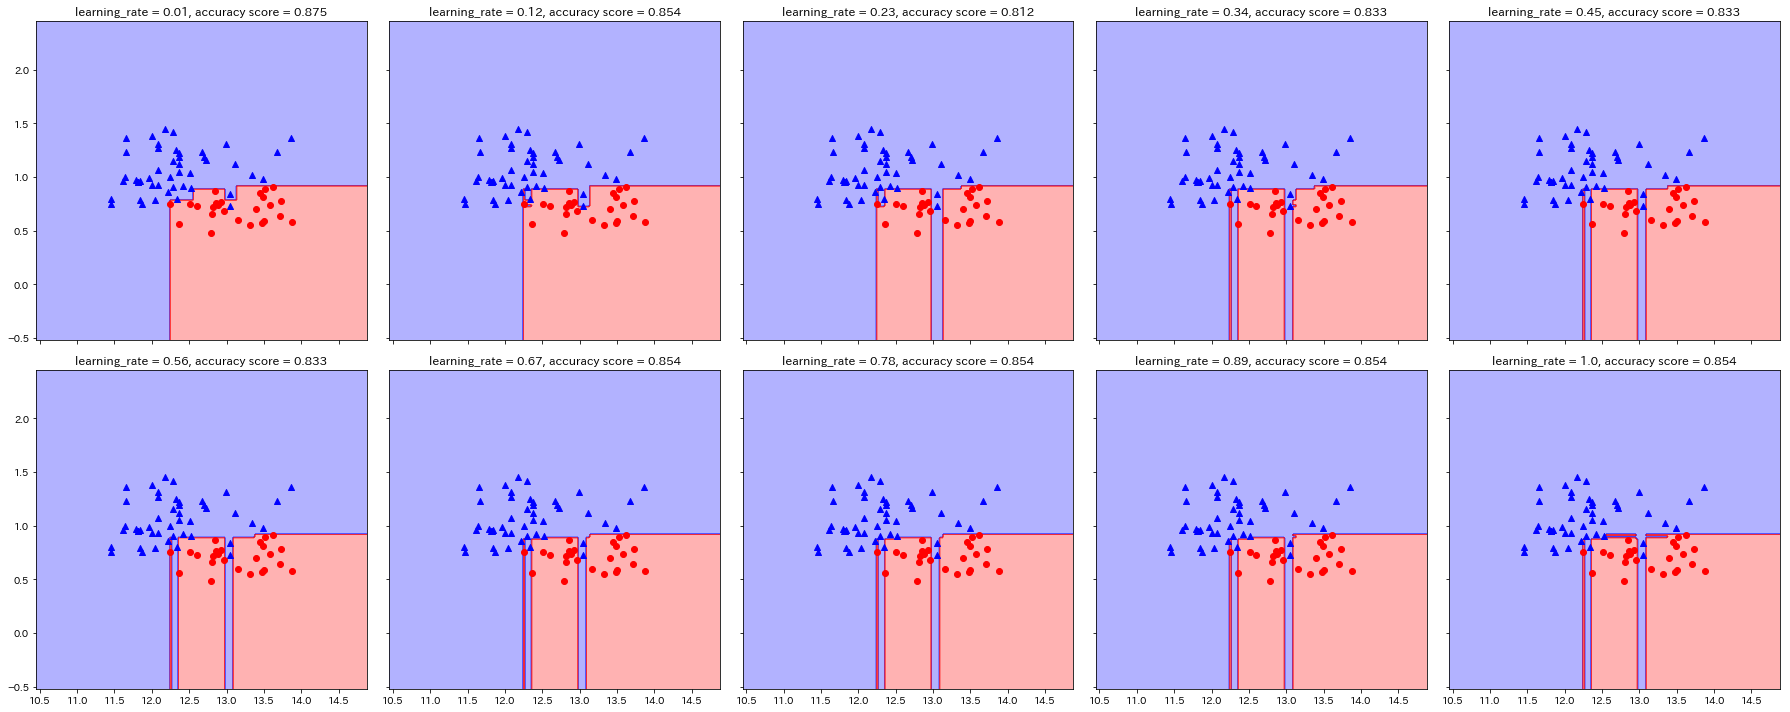

In [60]:
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]

f, axarr = plt.subplots(2, 5, sharex='col', sharey='row', figsize=(25, 10))

learning_rates = np.linspace(0.01, 1, 10)

for learning_rate, idx in zip(learning_rates, product([0, 1], [0, 1, 2, 3, 4])):
    ada.set_params(learning_rate=learning_rate).fit(X_train, y_train)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    print("learning_rate = {}の時, 12　番目のestimator error={}".format(learning_rate, clf.estimator_errors_[100]))
    Z = Z.reshape(xx.shape)
    
    axarr[idx[0], idx[1]].set_title('learning_rate = {}, accuracy score = {:.3f}'.format(learning_rate, ada.score(X_test, y_test)))
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    axarr[idx[0], idx[1]].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], c='blue', marker='^')
    axarr[idx[0], idx[1]].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c='red', marker='o')

plt.tight_layout()